In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np


In [4]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Compressed\archive\resume_data.csv")
data.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [5]:
# Check missing values
missing_summary = data.isnull().sum()

# Drop irrelevant columns with too many missing values
data = data.drop(['address', 'languages', 'proficiency_levels'], axis=1)

# Fill missing values in `career_objective` with "Not Provided"
data['career_objective'] = data['career_objective'].fillna("Not Provided")

# Fill missing `matched_score` with 0 (or the median)
data['matched_score'] = data['matched_score'].fillna(0)

# Display updated missing value summary
missing_summary_after = data.isnull().sum()


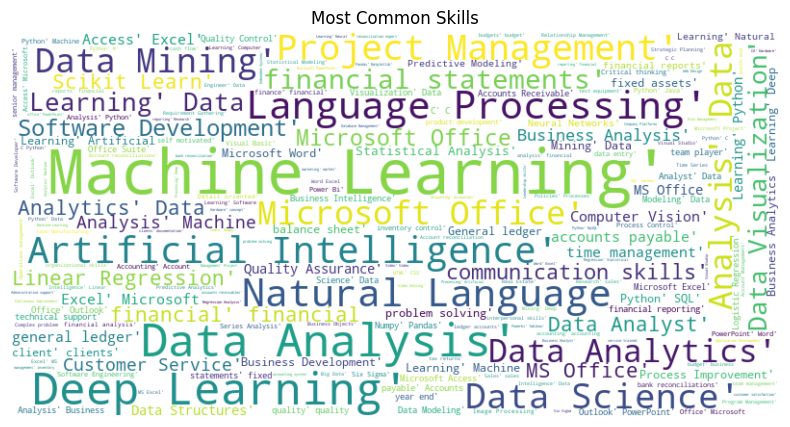

In [6]:
# Combine all skills into a single string
skills_combined = " ".join(data['skills'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_combined)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Skills")
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\['
<>:3: SyntaxWarning: invalid escape sequence '\['
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18348\389697511.py:3: SyntaxWarning: invalid escape sequence '\['
  data['educational_institution_name'] = data['educational_institution_name'].str.replace("[\[\]']", "", regex=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18348\389697511.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_institutions.index, x=top_institutions.values, palette="viridis")


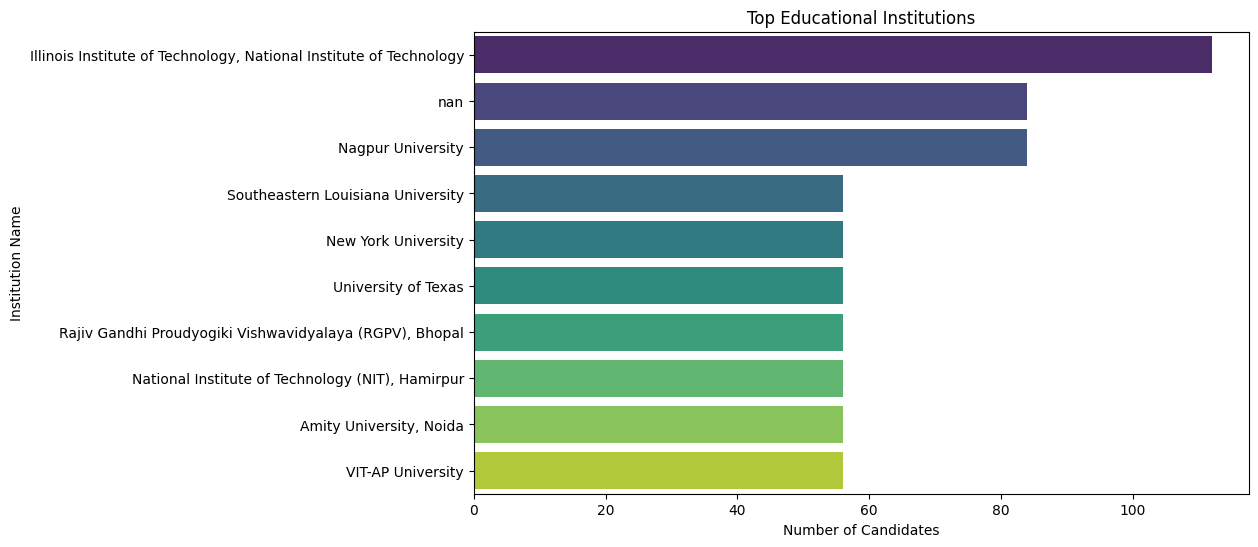

In [7]:
# Flatten the list of institutions (if stored as lists)
data['educational_institution_name'] = data['educational_institution_name'].astype(str)
data['educational_institution_name'] = data['educational_institution_name'].str.replace("[\[\]']", "", regex=True)

# Count most frequent institutions
top_institutions = data['educational_institution_name'].value_counts().head(10)

# Plot the top institutions
plt.figure(figsize=(10, 6))
sns.barplot(y=top_institutions.index, x=top_institutions.values, palette="viridis")
plt.title("Top Educational Institutions")
plt.xlabel("Number of Candidates")
plt.ylabel("Institution Name")
plt.show()


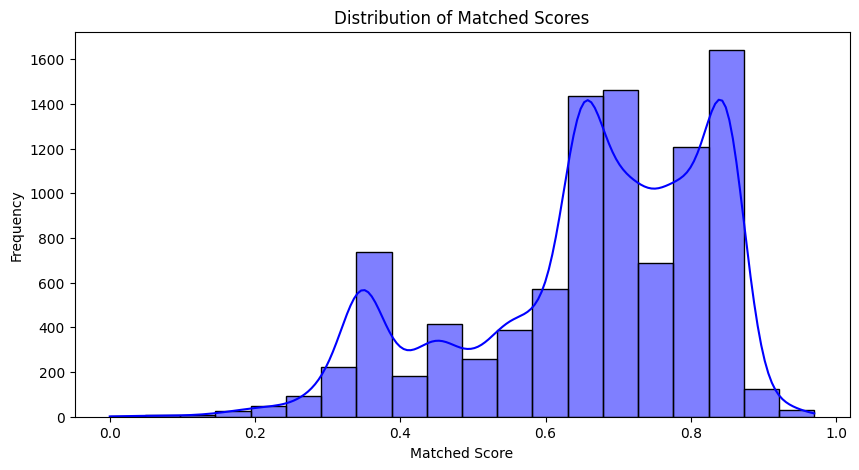

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(data['matched_score'], bins=20, kde=True, color="blue")
plt.title("Distribution of Matched Scores")
plt.xlabel("Matched Score")
plt.ylabel("Frequency")
plt.show()


In [11]:
# Convert numerical fields for analysis
data['matched_score'] = pd.to_numeric(data['matched_score'], errors='coerce')

# Correlation heatmap
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: "['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapreduce', 'Spark', 'Java', 'Machine Learning', 'Cloud', 'Hdfs', 'YARN', 'Core Java', 'Data Science', 'C++', 'Data Structures', 'DBMS', 'RDBMS', 'Informatica', 'Talend', 'Amazon Redshift', 'Microsoft Azure']"

In [14]:
#Export cleaned data
cleaned_file_path = r'C:\Users\Lenovo\Downloads\Compressed\archive\cleaned_resume_data.csv'
data.to_csv(cleaned_file_path, index=False)

In [16]:
data.describe()

,matched_score
count,9544.000000
mean,0.660831
std,0.167040
min,0.000000
25%,0.583333
50%,0.683333
75%,0.793333
max,0.970000


In [17]:
data.describe(include="all")

,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,company_urls,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
count,9544,9488,9544,9460,9460,9460,9460,9460,9460,9460,...,2008,2008,2008,9544,9544,8180,5457,9544,7843,9544.000000
unique,172,340,329,180,149,78,30,210,199,16,...,7,30,11,28,20,17,14,28,23,NaN
top,Not Provided,[],"Illinois Institute of Technology, National Ins...",['B.Tech'],['2019'],['N/A'],['N/A'],['N/A'],"['Company Name', 'Company Name', 'Company Name']",['N/A'],...,[None],['N/A'],[None],Project Coordinator (Civil),Bachelor/Honors,At least 5 years,Age 25 to 40 years,Project Design\nData Analysis\nACCORD/Alliance...,AutoCAD\nCommunication and negotiation skills\...,NaN
freq,4804,56,112,1764,1428,3612,3416,616,1204,2436,...,1196,644,1028,342,2044,1024,1023,342,342,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660831
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167040
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683333
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793333


In [18]:
data.describe(include=["object"])

,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,company_urls,...,certification_skills,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required
count,9544,9488,9544,9460,9460,9460,9460,9460,9460,9460,...,2008,2008,2008,2008,9544,9544,8180,5457,9544,7843
unique,172,340,329,180,149,78,30,210,199,16,...,32,7,30,11,28,20,17,14,28,23
top,Not Provided,[],"Illinois Institute of Technology, National Ins...",['B.Tech'],['2019'],['N/A'],['N/A'],['N/A'],"['Company Name', 'Company Name', 'Company Name']",['N/A'],...,[None],[None],['N/A'],[None],Project Coordinator (Civil),Bachelor/Honors,At least 5 years,Age 25 to 40 years,Project Design\nData Analysis\nACCORD/Alliance...,AutoCAD\nCommunication and negotiation skills\...
freq,4804,56,112,1764,1428,3612,3416,616,1204,2436,...,832,1196,644,1028,342,2044,1024,1023,342,342


In [19]:
data.describe(include=["number"])

,matched_score
count,9544.000000
mean,0.660831
std,0.167040
min,0.000000
25%,0.583333
50%,0.683333
75%,0.793333
max,0.970000
